**Versión F – Análisis de Ventas de Videojuegos en 2024**

### **Fundamentos de Data Science**

**Análisis de Ventas de Videojuegos en 2024**

**Requisitos:**

Tu tarea es limpiar y explorar un dataset que contiene información sobre las ventas de videojuegos en el año 2024. Este análisis es crucial para entender las tendencias de mercado y los factores que influyen en las ventas de videojuegos.

**El dataset puede ser encontrado aquí.**

**Limpieza de datos con Python:**

**Detección y eliminación de valores duplicados:** Asegúrate de que cada registro en el dataset sea único.

**Verificación y ajuste de tipos de datos:** Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

**Consistencia en valores categóricos:** Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).

**Manejo de valores faltantes:** Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

**Detección de datos anómalos:** Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).

**Exploración de datos con Python:**

**Visualizaciones exploratorias univariadas:** Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Visualizaciones exploratorias multivariadas:** Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Análisis adicional:**

**Estadísticas descriptivas:** Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

**Identificación de tendencias:** Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

**Análisis de correlación:** Identifica y analiza las correlaciones más fuertes entre las variables del dataset.

**Predicción de ventas:** Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles.

**Entrega:**

Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 5 visualizaciones.

Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un **TAG** incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

**NOTA:** Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.
Notas:

Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.

Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.

Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – **PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA.** Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. 

La falta de citas será considerada plagio y resultará en la falla del examen.

No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.

Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.


In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Paso 1: Cargar el dataset
df = pd.read_csv('../data/vgchartz-2024.csv')

In [3]:
# Dimensiones
print("Dimensiones: filas, columnas")
print(df.shape)

print("5 primeros registros")
print(df.head(5))

print("5 ultimos registros")
print(df.tail(5))

Dimensiones: filas, columnas
(64016, 14)
5 primeros registros
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Trey

In [4]:
# Obtener información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [5]:
# Obtener estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       critic_score   total_sales      na_sales     jp_sales     pal_sales  \
count   6678.000000  18922.000000  12637.000000  6726.000000  12824.000000   
mean       7.220440      0.349113      0.264740     0.102281      0.149472   
std        1.457066      0.807462      0.494787     0.168811      0.392653   
min        1.000000      0.000000      0.000000     0.000000      0.000000   
25%        6.400000      0.030000      0.050000     0.020000      0.010000   
50%        7.500000      0.120000      0.120000     0.040000      0.040000   
75%        8.300000      0.340000      0.280000     0.120000      0.140000   
max       10.000000     20.320000      9.760000     2.130000      9.850000   

        other_sales  
count  15128.000000  
mean       0.043041  
std        0.126643  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.030000  
max        3.120000  


In [6]:
# Contar el número de filas duplicadas en el DataFrame
num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


In [7]:
# Ver datos nulos
df.isnull().sum(axis=0)

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [8]:
# Asignar valor 0 a los campos nulos en las columnas específicas
# considerando que total_sales es la sumatoria de estos campos

columns_to_fill = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# Mostrar el DataFrame después de la corrección
print("\nDataFrame después de reemplazar valores nulos por 0:")
print(df)


DataFrame después de reemplazar valores nulos por 0:
                                                 img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
...                                              ...   
64011  /games/boxart/full_2779838AmericaFrontccc.jpg   
64012  /games/boxart/full_8031506AmericaFrontccc.jpg   
64013  /games/boxart/full_6553045AmericaFrontccc.jpg   
64014    /games/boxart/full_6012940JapanFrontccc.png   
64015                      /games/boxart/default.jpg   

                                  title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3            

In [9]:
# Ver datos nulos
df.isnull().sum(axis=0)

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64

In [10]:
# Calcular la suma de las columnas de ventas
##df['calculated_total_sales'] = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1)

# Rellenar los nulos en total_sales con la suma calculada
##df['total_sales'] = df['total_sales'].fillna(df['calculated_total_sales'])

# Eliminar la columna temporal de suma
##df.drop(columns=['calculated_total_sales'], inplace=True)

df['total_sales'] = df['total_sales'].fillna(df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1))

In [11]:
# Ver datos nulos
df.isnull().sum(axis=0)

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64

In [12]:
# Definir los tipos de datos esperados
schema = {
    'img': 'object',                # URL o ruta de la imagen del juego
    'title': 'object',              # Título del juego
    'console': 'object',            # Plataforma en la que se lanzó el juego
    'genre': 'object',              # Género del juego
    'publisher': 'object',          # Compañía que publicó el juego
    'developer': 'object',          # Compañía que desarrolló el juego
    'critic_score': 'float64',      # Puntuación del juego según críticos
    'total_sales': 'float64',       # Ventas totales del juego
    'na_sales': 'float64',          # Ventas en América del Norte
    'jp_sales': 'float64',          # Ventas en Japón
    'pal_sales': 'float64',         # Ventas en regiones PAL
    'other_sales': 'float64',       # Ventas en otras regiones
    'release_date': 'object',       # Fecha de lanzamiento del juego
    'last_update': 'object'         # Fecha de la última actualización del registro
}


In [13]:
# Convertir las columnas a los tipos de datos esperados
for column, dtype in schema.items():
    if dtype == 'datetime64[ns]':
        df[column] = pd.to_datetime(df[column], errors='coerce')  # Convirtiendo a datetime
    else:
        # Verificar si hay valores nulos antes de la conversión
        if df[column].isnull().any():
            print(f"Advertencia: La columna '{column}' contiene valores nulos. Puede que no se pueda convertir correctamente.")
        df[column] = df[column].astype(dtype, errors='raise')  # Cambia a 'coerce' si quieres manejar errores
        

Advertencia: La columna 'developer' contiene valores nulos. Puede que no se pueda convertir correctamente.
Advertencia: La columna 'critic_score' contiene valores nulos. Puede que no se pueda convertir correctamente.
Advertencia: La columna 'release_date' contiene valores nulos. Puede que no se pueda convertir correctamente.
Advertencia: La columna 'last_update' contiene valores nulos. Puede que no se pueda convertir correctamente.


In [14]:
# Ver datos nulos
df.isnull().sum(axis=0)

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   64016 non-null  float64
 8   na_sales      64016 non-null  float64
 9   jp_sales      64016 non-null  float64
 10  pal_sales     64016 non-null  float64
 11  other_sales   64016 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None


In [16]:
# Calcular el porcentaje de valores nulos solo en las columnas 'developer' y 'release_date'
columnas_especificas = ['developer', 'release_date']
nulos_por_columna = df[columnas_especificas].isnull().sum()  # Contar los valores nulos
total_filas = df.shape[0]                                    # Total de filas en el DataFrame

# Calcular el porcentaje de valores nulos
porcentaje_nulos = (nulos_por_columna / total_filas) * 100

# Mostrar el resultado con formato porcentual
for columna, porcentaje in porcentaje_nulos.items():
    print(f"Porcentaje de valores nulos en '{columna}': {porcentaje:.2f}%")

Porcentaje de valores nulos en 'developer': 0.03%
Porcentaje de valores nulos en 'release_date': 11.01%


In [17]:
# usando un criterio de porcentaje menor al 20% no es relevante con relacion al total.
# se decide eliminar los registros

#df.dropna(subset=['developer', 'release_date'], inplace=True)

In [17]:
# Ver datos nulos
df.isnull().sum(axis=0)

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64

In [18]:
# predecir valores critic_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Separar los datos
df_no_nulls = df[df['critic_score'].notnull()]  # Datos sin nulos
df_nulls = df[df['critic_score'].isnull()]      # Datos con nulos

# 2. Definir las variables independientes y dependientes
X = df_no_nulls[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]  # Variables independientes
y = df_no_nulls['critic_score']  # Variable dependiente

# 3. Entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# 4. Predecir los valores de critic_score donde hay nulos
X_nulls = df_nulls[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]
predictions = model.predict(X_nulls)

# 5. Rellenar los valores nulos en critic_score
df.loc[df['critic_score'].isnull(), 'critic_score'] = predictions

In [19]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
last_update,17879,46137,72.07
release_date,56965,7051,11.01
developer,63999,17,0.03
img,64016,0,0.00
title,64016,0,0.00
console,64016,0,0.00
genre,64016,0,0.00
publisher,64016,0,0.00
critic_score,64016,0,0.00
total_sales,64016,0,0.00


In [20]:
# Por ejemplo, eliminar filas donde 'developer' son nulos
df = df.dropna(subset=['developer'])

# Ver datos nulos
df.isnull().sum(axis=0)

img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7045
last_update     46122
dtype: int64

In [21]:
# Convertir la columna 'genre' a una lista de valores únicos y ordenarlos
lista_genres_unicos = sorted(df['genre'].unique().tolist())

# Imprimir cada género único en una nueva línea
print("Lista de géneros únicos (ordenados):")
for genre in lista_genres_unicos:
    print(genre)

Lista de géneros únicos (ordenados):
Action
Action-Adventure
Adventure
Board Game
Education
Fighting
MMO
Misc
Music
Party
Platform
Puzzle
Racing
Role-Playing
Sandbox
Shooter
Simulation
Sports
Strategy
Visual Novel


**Analizando los valores de Generos, 

In [22]:
# Agrupar por género y contar el número de registros en cada grupo
grupo_por_genero = df.groupby('genre').agg(
    conteo=('title', 'count'),             # Contar el número de títulos
    ventas_totales=('total_sales', 'sum')  # Sumar las ventas totales
).reset_index()

# Imprimir el resultado
print(grupo_por_genero)

               genre  conteo  ventas_totales
0             Action    8556         1125.89
1   Action-Adventure    1877          148.52
2          Adventure    6258          325.39
3         Board Game      33            0.33
4          Education      35            0.97
5           Fighting    2366          341.13
6                MMO     115            9.31
7               Misc    9301          557.65
8              Music     297           51.75
9              Party     151            6.21
10          Platform    4000          349.15
11            Puzzle    3519          127.28
12            Racing    3425          525.75
13      Role-Playing    5719          426.80
14           Sandbox      20            1.89
15           Shooter    5407          995.50
16        Simulation    3158          300.65
17            Sports    5586         1187.51
18          Strategy    3683          118.22
19      Visual Novel     493            5.78


In [23]:
# Identificar valores negativos en la columna 'total_sales'
anomalos_ventas = df[df['total_sales'] < 0]

# Imprimir los registros anómalos
print("Registros con ventas negativas:")
print(anomalos_ventas)


Registros con ventas negativas:
Empty DataFrame
Columns: [img, title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []


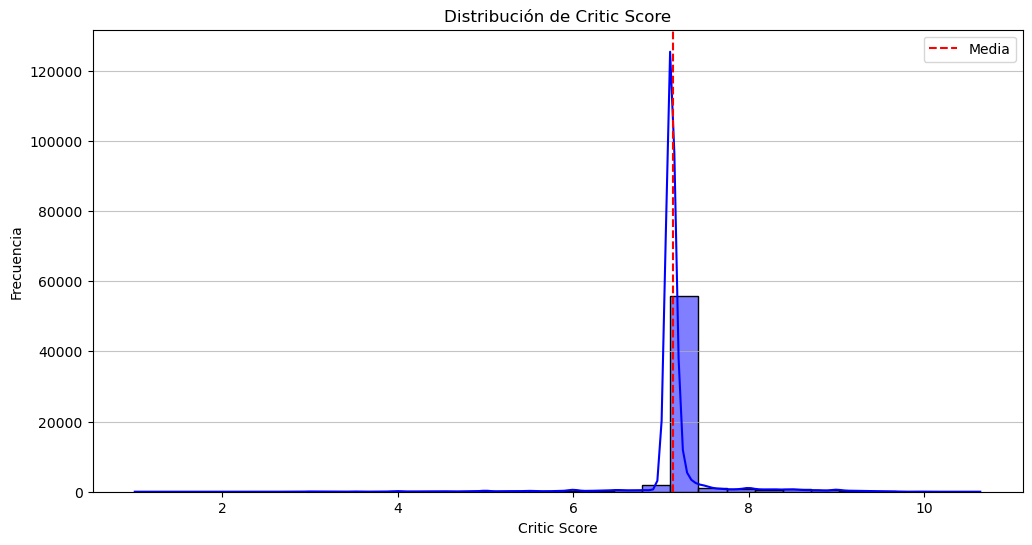

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualización 1: Histograma de la puntuación crítica
plt.figure(figsize=(12, 6))
sns.histplot(df['critic_score'], bins=30, kde=True, color='blue')
plt.title('Distribución de Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.axvline(df['critic_score'].mean(), color='red', linestyle='--', label='Media')
plt.legend()
plt.show()

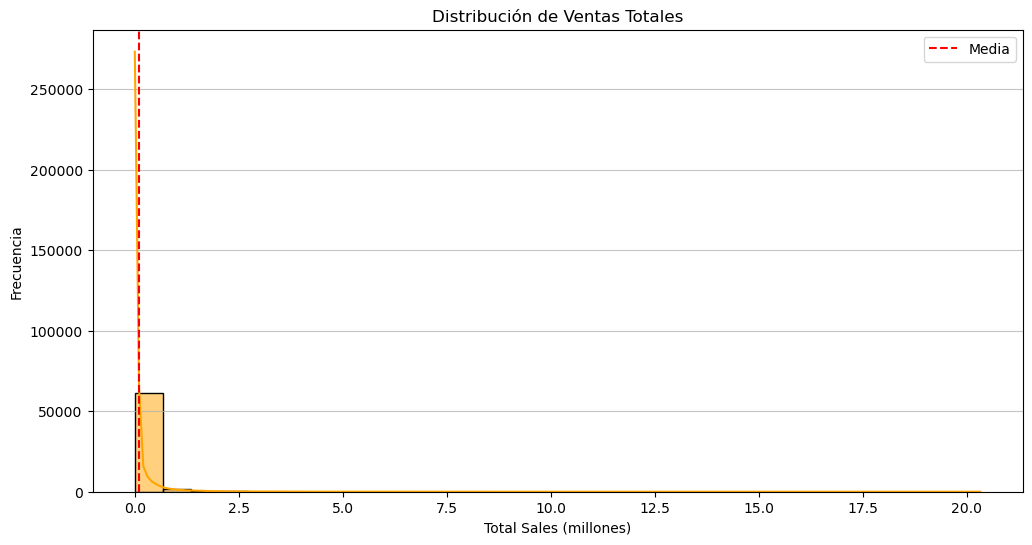

In [26]:
# Visualización 1: Histograma de las ventas totales
plt.figure(figsize=(12, 6))
sns.histplot(df['total_sales'], bins=30, kde=True, color='orange')
plt.title('Distribución de Ventas Totales')
plt.xlabel('Total Sales (millones)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.axvline(df['total_sales'].mean(), color='red', linestyle='--', label='Media')
plt.legend()
plt.show()

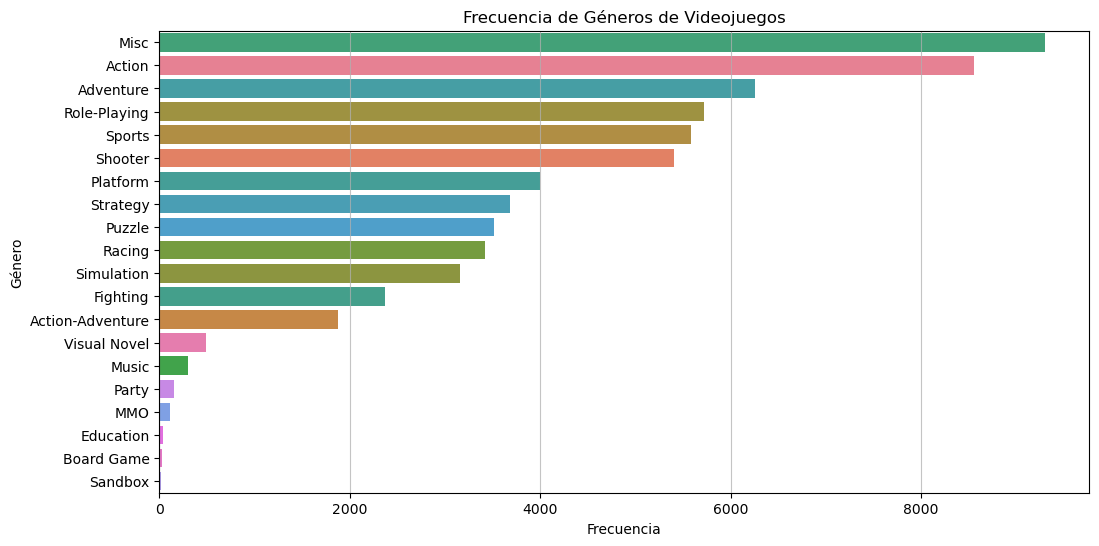

In [27]:
# Visualización 2: Gráfico de barras de la frecuencia de géneros
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='genre', order=df['genre'].value_counts().index, hue='genre', legend=False)
plt.title('Frecuencia de Géneros de Videojuegos')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.grid(axis='x', alpha=0.75)
plt.show()

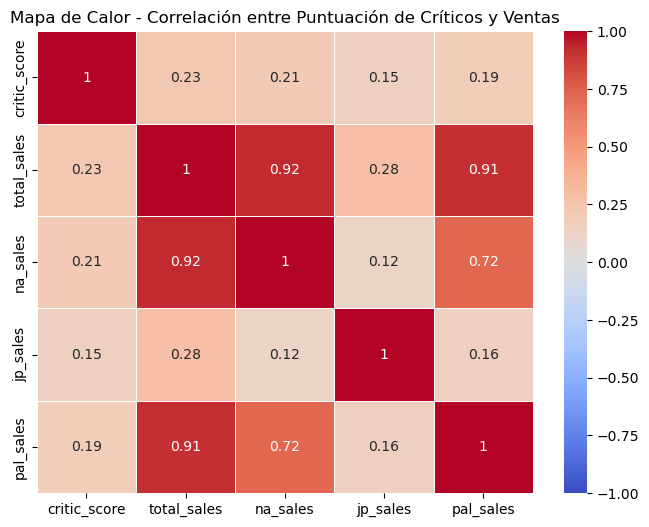

In [28]:
# Calcular la correlación entre critic_score y ventas
matriz_correlacion_ventas = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].dropna().corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion_ventas, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de Calor - Correlación entre Puntuación de Críticos y Ventas')
plt.show()

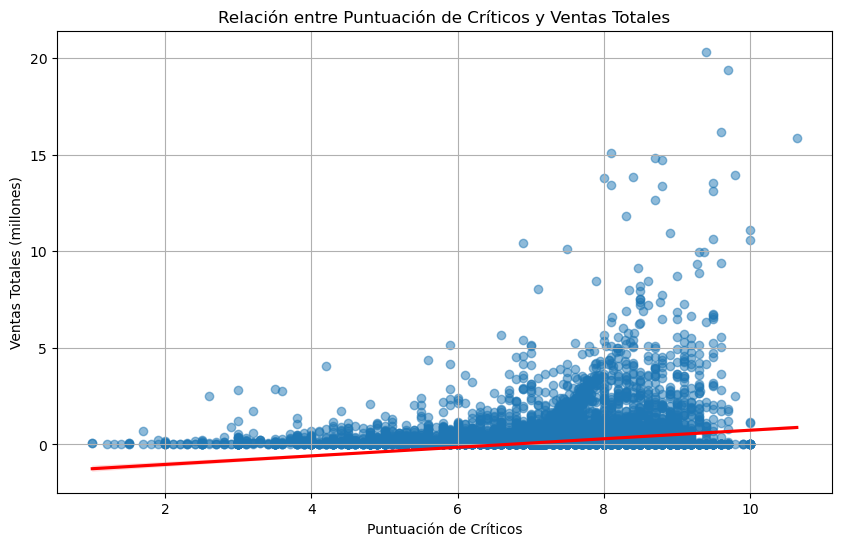

In [29]:
# Visualización 1: Gráfico de dispersión con regresión lineal
plt.figure(figsize=(10, 6))
sns.regplot(x='critic_score', y='total_sales', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación entre Puntuación de Críticos y Ventas Totales')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

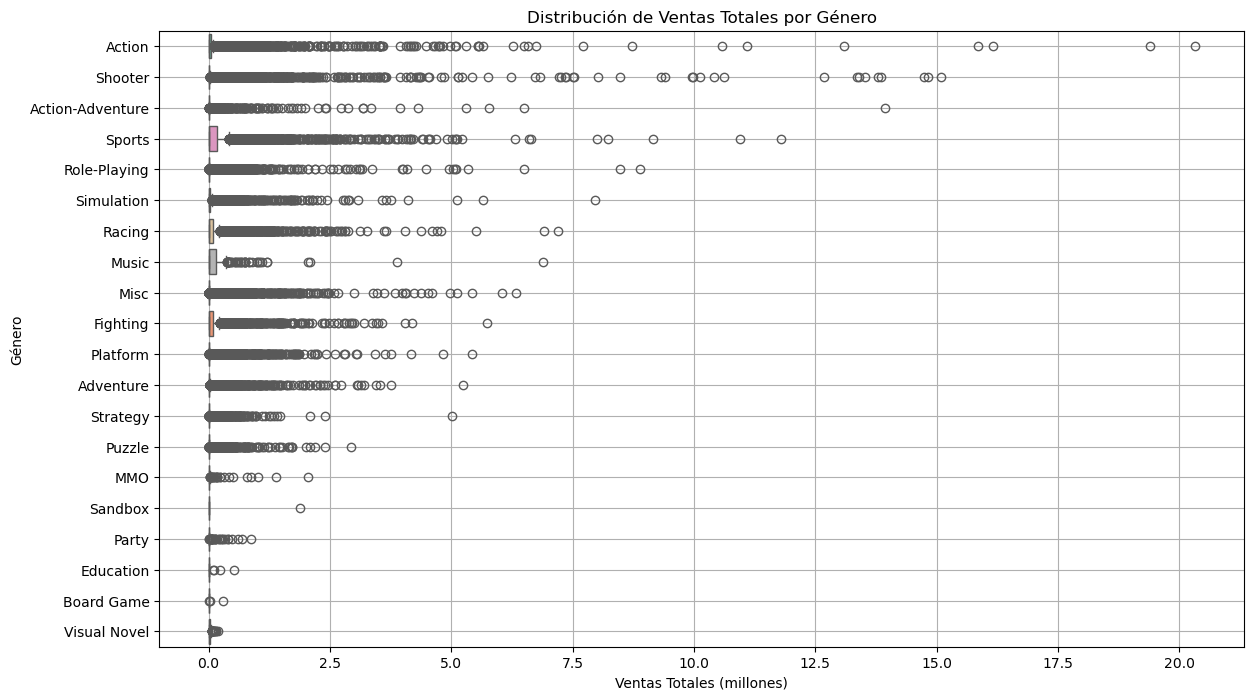

In [30]:
# Solución 2: Usar hue para asignar colores
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='genre', data=df, hue='genre', palette='Set2', dodge=False)
plt.title('Distribución de Ventas Totales por Género')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Género')
plt.grid(True)
plt.legend([],[], frameon=False)  # Opcional para ocultar la leyenda si no es necesaria
plt.show()

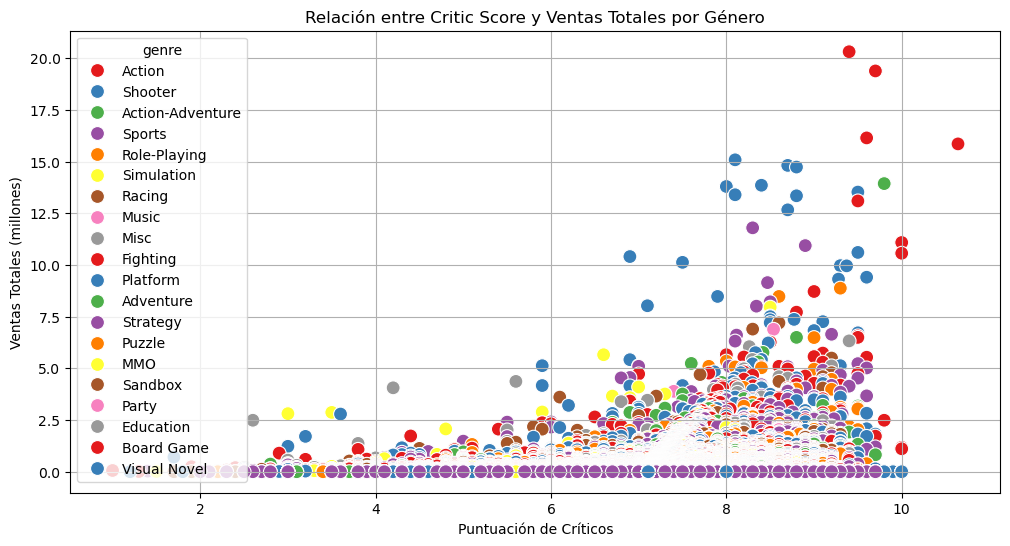

In [31]:
# Visualización 1: Gráfico de dispersión entre ventas totales y critic_score, coloreado por género
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', hue='genre', data=df, palette='Set1', s=100)
plt.title('Relación entre Critic Score y Ventas Totales por Género')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

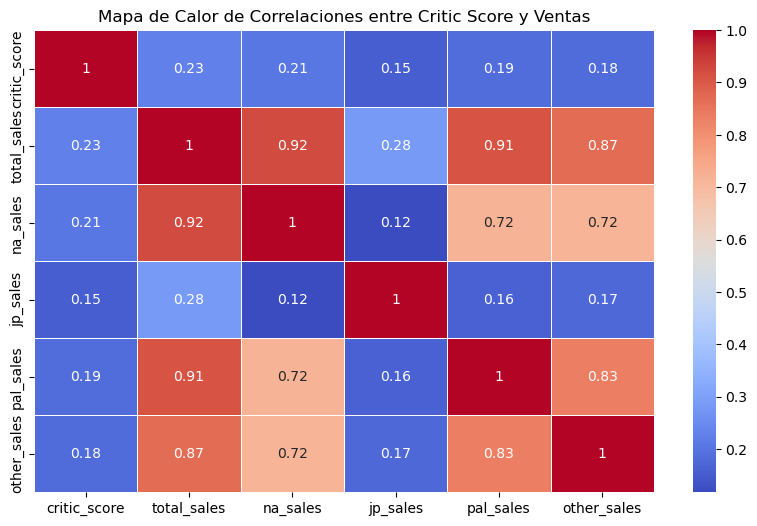

In [32]:
# Visualización 2: Mapa de calor de la correlación entre las variables
plt.figure(figsize=(10, 6))
correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Critic Score y Ventas')
plt.show()

In [33]:
# Estadísticas descriptivas para las variables numéricas
print(df.describe())

       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  63999.000000  63999.000000  63999.000000  63999.000000  63999.000000   
mean       7.138905      0.103215      0.052271      0.010749      0.029951   
std        0.477819      0.467059      0.243811      0.063075      0.185665   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.109544      0.000000      0.000000      0.000000      0.000000   
50%        7.109544      0.000000      0.000000      0.000000      0.000000   
75%        7.110925      0.020000      0.000000      0.000000      0.000000   
max       10.641894     20.320000      9.760000      2.130000      9.850000   

        other_sales  
count  63999.000000  
mean       0.010174  
std        0.064229  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.120000  


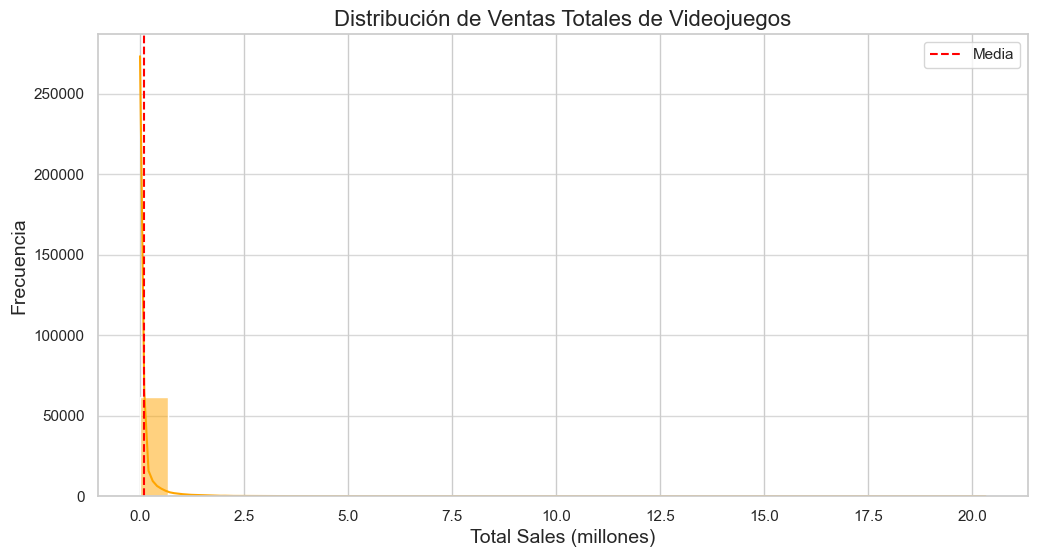

In [34]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el histograma de ventas totales
plt.figure(figsize=(12, 6))
sns.histplot(df['total_sales'], bins=30, kde=True, color='orange')

# Añadir título y etiquetas
plt.title('Distribución de Ventas Totales de Videojuegos', fontsize=16)
plt.xlabel('Total Sales (millones)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# Añadir línea vertical para la media
plt.axvline(df['total_sales'].mean(), color='red', linestyle='--', label='Media')
plt.legend()

# Mostrar el gráfico
plt.show()

## Interpretación del Gráfico

**Distribución de Ventas:**

En el histograma, se espera que la mayoría de las barras estén concentradas en el lado izquierdo del gráfico, lo que indica que la mayoría de los videojuegos tienen ventas totales que caen en el rango bajo (por ejemplo, entre 0 y 5 millones).

**Tendencia Asimétrica:**

Si observas que hay algunas barras mucho más altas a la derecha (indicando un número menor de juegos con ventas altas), esto confirma la tendencia de que, aunque hay algunos títulos que generan ventas significativas, la mayoría de los juegos no alcanzan ventas elevadas.

**Línea de Media:**

La línea roja discontinua indica la media de las ventas totales. Si se encuentra más hacia la izquierda, esto refuerza la idea de que la mayoría de los títulos tienen ventas por debajo de la media.

**No se encuentra valores negativos.**

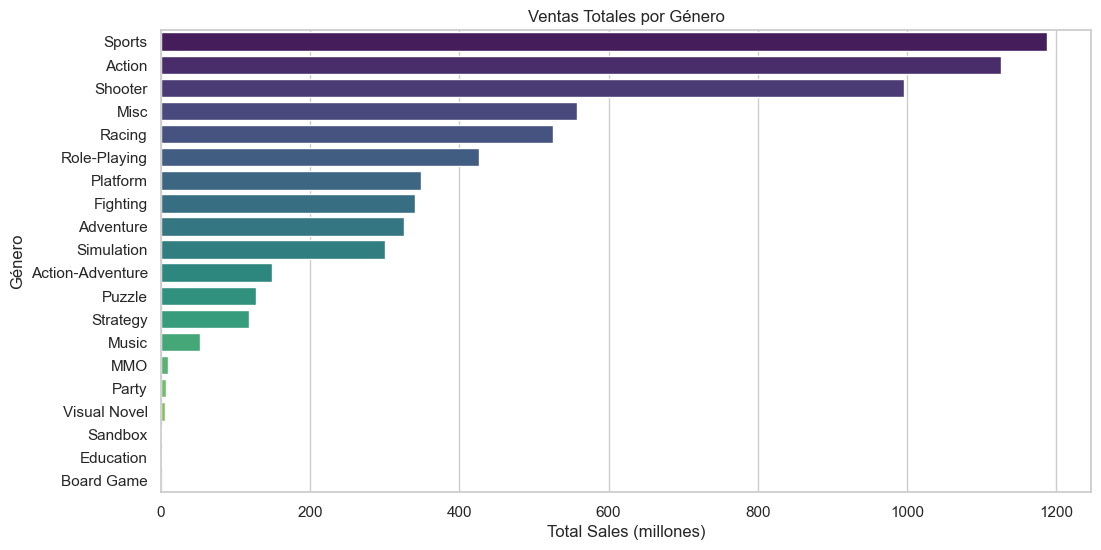

In [35]:

# Calcular las ventas totales por género
ventas_por_genero = df.groupby('genre')['total_sales'].sum().reset_index()

# Ordenar por ventas
ventas_por_genero = ventas_por_genero.sort_values(by='total_sales', ascending=False)

# Supongamos que 'ventas_por_genero' es tu DataFrame con las columnas 'genre' y 'total_sales'
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_genero, x='total_sales', y='genre', hue='genre', palette='viridis', legend=False)
plt.title('Ventas Totales por Género')
plt.xlabel('Total Sales (millones)')
plt.ylabel('Género')
plt.show()

**Interpretación del Gráfico: Ventas Totales por Género**

**Descripción General:** El gráfico de barras presenta las ventas totales de videojuegos agrupadas por género. Cada barra representa el total de ventas en millones de unidades para un género específico.

**Tendencias Observadas:**

**Géneros con Mayor Ventas:** Si el gráfico muestra que géneros como "Action" o "Shooter" tienen las barras más largas, esto indica que estos géneros son los más populares y han generado más ingresos en comparación con otros géneros.

**Géneros con Ventas Bajas:** Géneros como "Puzzle" o "Simulation" podrían mostrar barras más cortas, sugiriendo que estos géneros tienen menos demanda en el mercado de videojuegos.

**Insights sobre el Mercado:**

La tendencia hacia géneros específicos puede reflejar las preferencias del consumidor. Por ejemplo, un aumento en las ventas de videojuegos de acción podría indicar una fuerte demanda en este tipo de juegos, posiblemente impulsada por tendencias culturales o lanzamientos exitosos.
La popularidad de ciertos géneros puede influir en las decisiones de desarrollo de videojuegos, guiando a los desarrolladores a crear más títulos en géneros con altas ventas.

**Relación entre Género y Ventas:**

La visualización no solo muestra el total de ventas, sino que también ayuda a identificar posibles correlaciones entre la popularidad de un género y el éxito comercial. Esto puede ser útil para realizar proyecciones sobre qué géneros podrían ser más rentables en el futuro.

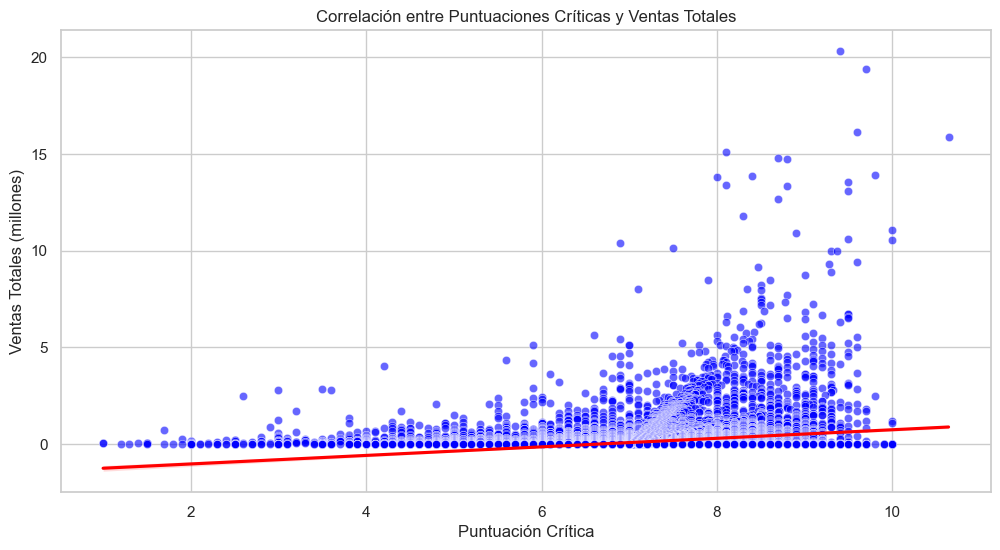

In [36]:
# Supongamos que df es tu DataFrame y ya tiene las columnas 'critic_score' y 'total_sales'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='critic_score', y='total_sales', color='blue', alpha=0.6)

# Añadir línea de tendencia
sns.regplot(data=df, x='critic_score', y='total_sales', scatter=False, color='red')

plt.title('Correlación entre Puntuaciones Críticas y Ventas Totales')
plt.xlabel('Puntuación Crítica')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

**Correlación entre Puntuaciones Críticas y Ventas** 

**• Visualización:** Gráfico de dispersión de critic_score frente a total_sales.

**o Interpretación:** Si observas una tendencia ascendente en el gráfico de dispersión, esto podría indicar que a medida que la puntuación crítica aumenta, las ventas también tienden a aumentar. Esto sugiere que la calidad del juego, medida a través de las críticas, tiene un impacto significativo en sus ventas.

**• Tendencia:** La relación entre la crítica y el rendimiento comercial es un factor importante para el éxito de un juego. Juegos con puntuaciones altas tienden a vender más, sugiriendo que las reseñas influyen en la decisión de compra.


              critic_score  total_sales  na_sales  jp_sales  pal_sales
critic_score      1.000000     0.226369  0.205590  0.152945   0.185903
total_sales       0.226369     1.000000  0.922097  0.284066   0.908952
na_sales          0.205590     0.922097  1.000000  0.117324   0.719020
jp_sales          0.152945     0.284066  0.117324  1.000000   0.160701
pal_sales         0.185903     0.908952  0.719020  0.160701   1.000000


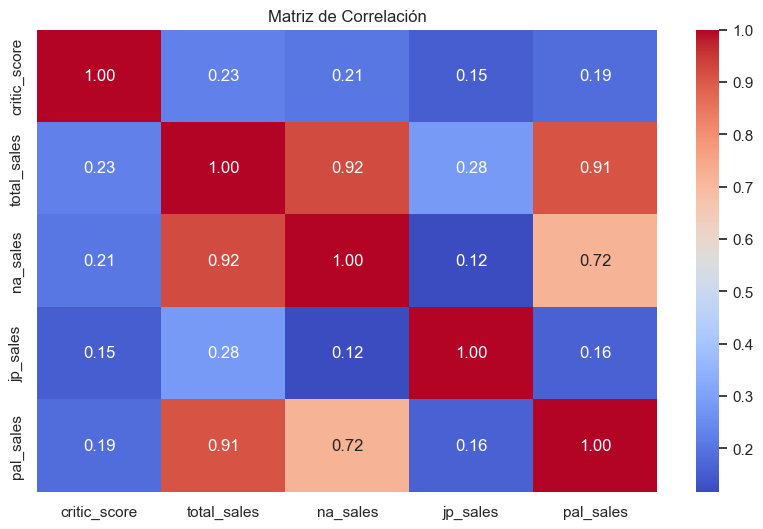

In [37]:
correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].dropna().corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## **Análisis de la Matriz de Correlación**


**Observaciones:**

**Correlación entre critic_score y total_sales:**

**Valor: 0.226**

**Interpretación:** Hay una correlación positiva baja entre la puntuación crítica y las ventas totales. Esto sugiere que los juegos con mejores críticas tienden a tener más ventas, aunque la relación no es muy fuerte.

**Correlación entre total_sales y na_sales:**

**Valor: 0.922**

**Interpretación:** Esta es una correlación muy alta, lo que indica que las ventas totales están fuertemente influenciadas por las ventas en América del Norte. Esto puede significar que el mercado de videojuegos en América del Norte es muy importante para el éxito general de un juego.

**Correlación entre total_sales y pal_sales:**

**Valor: 0.909**
**Interpretación:** Al igual que con na_sales, las ventas totales también tienen una fuerte correlación con las ventas en las regiones PAL (Europa y otras áreas). Esto sugiere que las ventas en estas regiones también son muy significativas para el éxito general del juego.

**Correlación entre na_sales y jp_sales:**

**Valor: 0.117**
**Interpretación:** Esta correlación es muy baja, lo que indica que las ventas en América del Norte no tienen una relación fuerte con las ventas en Japón. Esto podría ser indicativo de diferencias en las preferencias de los consumidores entre estas dos regiones.

**Correlación entre jp_sales y pal_sales:**

**Valor: 0.160**
**Interpretación:** También es baja, sugiriendo que las ventas en Japón no están significativamente relacionadas con las ventas en las regiones PAL.

Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.85


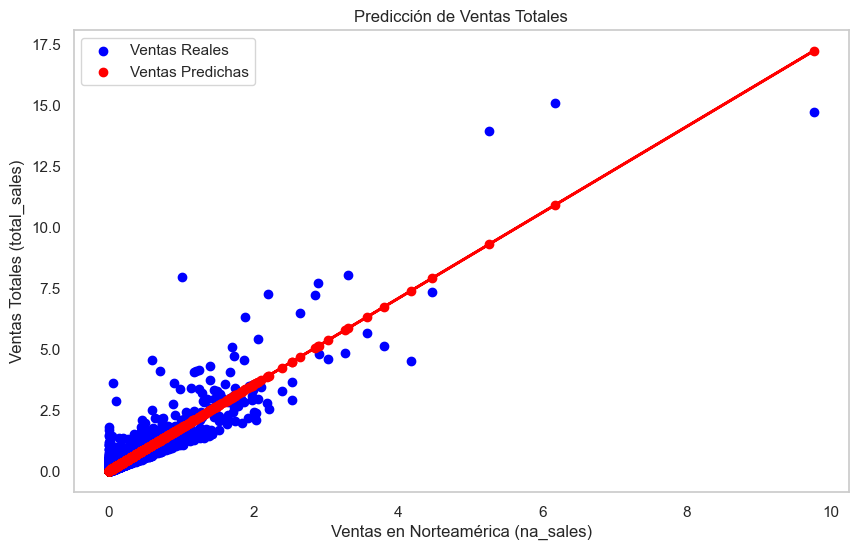

In [38]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el DataFrame (asegúrate de ajustar la ruta a tu archivo)
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Filtrar los datos, eliminando filas con valores nulos en total_sales o na_sales
df_clean = df[['total_sales', 'na_sales']].dropna()

# Definir las variables
X = df_clean[['na_sales']]  # Variable independiente
y = df_clean['total_sales']  # Variable dependiente

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Ventas Reales')
plt.scatter(X_test, y_pred, color='red', label='Ventas Predichas')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Predicción de Ventas Totales')
plt.xlabel('Ventas en Norteamérica (na_sales)')
plt.ylabel('Ventas Totales (total_sales)')
plt.legend()
plt.grid()
plt.show()


Error Cuadrático Medio (MSE): 0.19
Coeficiente de Determinación (R²): 0.07


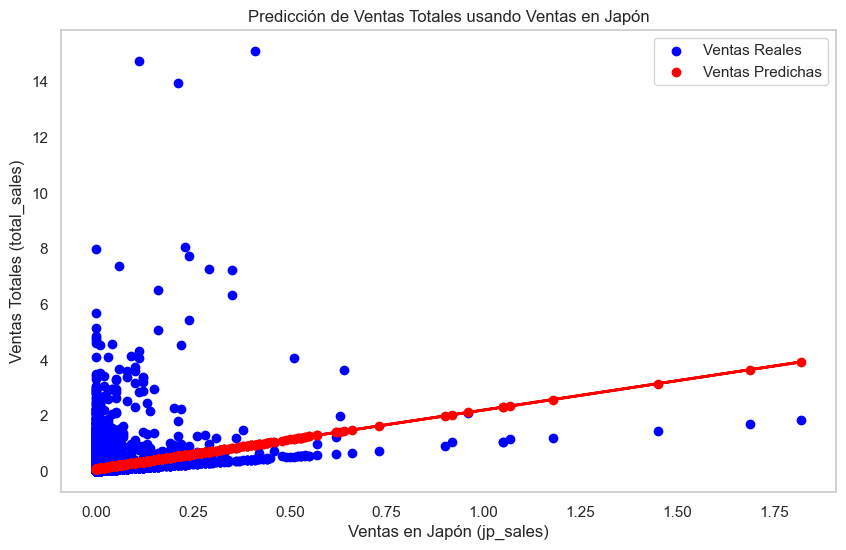

In [39]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el DataFrame (asegúrate de ajustar la ruta a tu archivo)
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Filtrar los datos, eliminando filas con valores nulos en total_sales o jp_sales
df_clean = df[['total_sales', 'jp_sales']].dropna()

# Definir las variables
X = df_clean[['jp_sales']]  # Variable independiente
y = df_clean['total_sales']  # Variable dependiente

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Ventas Reales')
plt.scatter(X_test, y_pred, color='red', label='Ventas Predichas')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Predicción de Ventas Totales usando Ventas en Japón')
plt.xlabel('Ventas en Japón (jp_sales)')
plt.ylabel('Ventas Totales (total_sales)')
plt.legend()
plt.grid()
plt.show()


Error Cuadrático Medio (MSE): 0.19
Coeficiente de Determinación (R²): 0.04


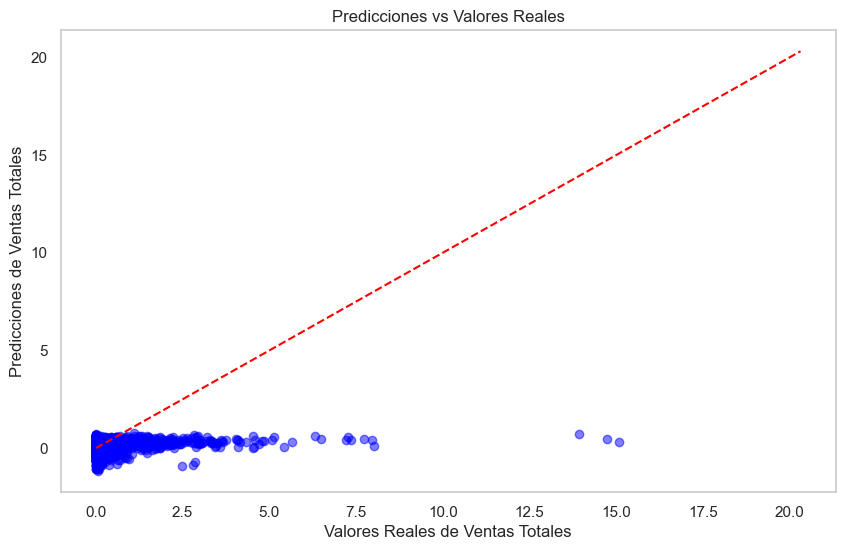

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que ya tienes tu DataFrame df cargado

# Eliminar filas con valores nulos en critic_score y total_sales
df = df.dropna(subset=['critic_score', 'total_sales'])

# Definir la variable independiente (X) y dependiente (y)
X = df[['critic_score']]  # Variable independiente
y = df['total_sales']     # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

# Calcular el coeficiente de determinación (R²)
r_squared = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r_squared:.2f}")

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales de Ventas Totales')
plt.ylabel('Predicciones de Ventas Totales')
plt.grid()
plt.show()
